RNN CODE 
NAME:SHREENIDHI.H
RNO:CB.SC.I5DAS18034

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('Srinidhi (1).xlsx')

In [4]:
df 

,SW,Max-Temp,Min-Temp,RH-M,RH-E,RF,Thrips
0,27,37.40,27.70,69.86,47.14,7.9,5.8
1,28,41.40,29.50,52.57,29.43,0.0,6.6
2,29,36.70,26.90,77.14,60.14,47.6,9.0
3,30,35.60,27.70,78.71,56.00,31.2,19.4
4,31,35.10,27.20,80.29,67.71,7.1,35.6
...,...,...,...,...,...,...,...
62,42,38.20,17.79,69.71,37.43,0.0,0.0
63,43,35.41,15.69,72.57,37.86,0.0,0.0
64,44,32.33,14.70,82.43,55.43,0.0,0.0
65,45,25.49,12.90,96.57,64.14,0.0,0.0


In [5]:
feature_keys=["SW","Max-Temp","Min-Temp","RH-M","RH-E","RF"]

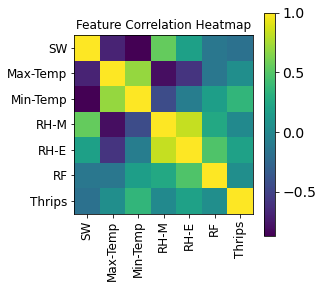

In [6]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=12, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=12)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=12)
    plt.show()


show_heatmap(df)

In [7]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
learning_rate = 0.001
batch_size = 33
epochs = 10

In [8]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [9]:
features=[feature_keys[i] for i in [0, 1, 2,3,4,5]]

In [10]:
features = df[features]
features.head()


,SW,Max-Temp,Min-Temp,RH-M,RH-E,RF
0,27,37.4,27.7,69.86,47.14,7.9
1,28,41.4,29.5,52.57,29.43,0.0
2,29,36.7,26.9,77.14,60.14,47.6
3,30,35.6,27.7,78.71,56.00,31.2
4,31,35.1,27.2,80.29,67.71,7.1


In [11]:
features = normalize(df.values, train_split)
features = pd.DataFrame(features)
features.head()


,0,1,2,3,4,5,6
0,-0.918051,0.075015,0.714406,-0.295688,-0.321265,-0.181214,-0.340139
1,-0.772280,1.193405,1.080657,-1.879428,-1.759040,-0.400884,-0.291814
2,-0.626508,-0.120703,0.551628,0.371150,0.734131,0.922697,-0.146839
3,-0.480736,-0.428260,0.714406,0.514959,0.398028,0.466673,0.481387
4,-0.334965,-0.568059,0.612670,0.659685,1.348696,-0.203459,1.459971


In [12]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [13]:
train_data

,0,1,2,3,4,5,6
0,-0.918051,0.075015,0.714406,-0.295688,-0.321265,-0.181214,-0.340139
1,-0.772280,1.193405,1.080657,-1.879428,-1.759040,-0.400884,-0.291814
2,-0.626508,-0.120703,0.551628,0.371150,0.734131,0.922697,-0.146839
3,-0.480736,-0.428260,0.714406,0.514959,0.398028,0.466673,0.481387
4,-0.334965,-0.568059,0.612670,0.659685,1.348696,-0.203459,1.459971
5,-0.189193,0.075015,0.673711,0.044143,-0.007894,-0.400884,4.625266
6,-0.043421,-0.232542,0.612670,-0.282864,-0.402450,-0.400884,2.958049
7,0.102350,0.270734,0.433614,-1.303272,-1.295477,-0.400884,1.870734
8,0.248122,-0.987455,0.144682,0.751284,1.071046,-0.264633,1.025045
9,0.393894,-1.406851,0.612670,1.811079,2.346452,5.900028,0.070624


In [14]:
x_train = train_data[[i for i in range(6)]].values
y_train = features.iloc[0:25][[1]]

In [15]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=1,
    sampling_rate=3,
    batch_size=batch_size)

In [16]:
x_end=len(val_data)-10

In [17]:
label_start = train_split-7

In [18]:
x_val = val_data.iloc[:x_end][[i for i in range(6)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val, 
    y_val,
    sequence_length=1,
    sampling_rate=3,
    batch_size=batch_size,
)

In [19]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (25, 1, 6)
Target shape: (25, 1)


In [20]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 6)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.4374 - val_loss: 1.5348

Epoch 00001: val_loss improved from inf to 1.53482, saving model to model_checkpoint.h5
Epoch 2/10
1/1 [==============================] - 0s 69ms/step - loss: 1.4145 - val_loss: 1.5437

Epoch 00002: val_loss did not improve from 1.53482
Epoch 3/10
1/1 [==============================] - 0s 69ms/step - loss: 1.3917 - val_loss: 1.5527

Epoch 00003: val_loss did not improve from 1.53482
Epoch 4/10
1/1 [==============================] - 0s 73ms/step - loss: 1.3693 - val_loss: 1.5618

Epoch 00004: val_loss did not improve from 1.53482
Epoch 5/10
1/1 [==============================] - 0s 69ms/step - loss: 1.3471 - val_loss: 1.5710

Epoch 00005: val_loss did not improve from 1.53482
Epoch 6/10
1/1 [==============================] - 0s 70ms/step - loss: 1.3251 - val_loss: 1.5804

Epoch 00006: val_loss did not improve from 1.53482


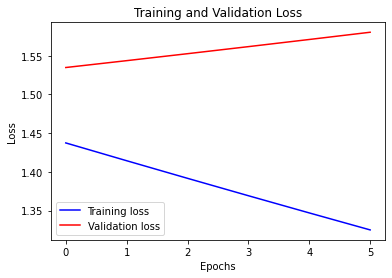

In [22]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

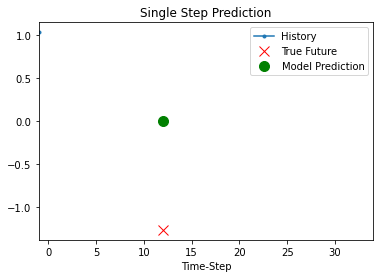

In [23]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+ 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [24]:
y_train


,1
0,0.075015
1,1.193405
2,-0.120703
3,-0.428260
4,-0.568059
5,0.075015
6,-0.232542
7,0.270734
8,-0.987455
9,-1.406851
